<IPython.core.display.Javascript object>


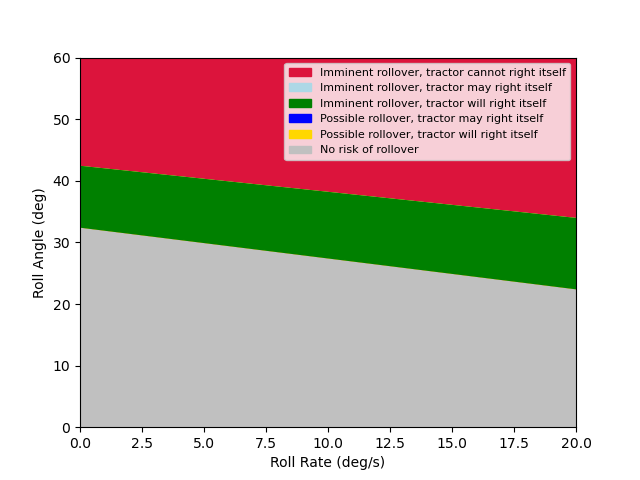

interactive(children=(FloatSlider(value=1.25, description='Tractor CG Height (m)', layout=Layout(height='40px'…

<function __main__.update_plot(h0_1=1.25, h0_2=2.0, m_1=7500, m_2=15000, w_1=2.2, w_2=2.2, alat=1.0)>

In [227]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from math import sqrt, acos, atan, degrees, radians

class Vehicle:
    def __init__(self, w, h0, m, Ixx):
        self.w = w
        self.h0 = h0
        self.m = m
        self.hmax = sqrt(h0**2 + (w/2)**2)
        self.d = degrees(atan(2*h0/w))
        self.Ip= Ixx + m*(self.hmax**2)
        
class Combination_Vehicle:
    def __init__(self, tractor, trailer):
        self.w = (tractor.w + trailer.w) / 2
        self.m = tractor.m + trailer.m
        self.h0 = tractor.h0*(tractor.m / self.m) + trailer.h0*(trailer.m / self.m)
        self.hmax = sqrt(self.h0**2 + (self.w/2)**2)
        self.d = degrees(atan(2*self.h0/self.w))
        self.Ip = tractor.Ip + trailer.Ip
        
def rmax(v, omega_d, alat):
    amag = sqrt(9.8**2+alat**2)
    adir = degrees(atan(alat / 9.8))
    omega_r = radians(omega_d)
    return 90 - v.d - degrees(acos(1 - (v.Ip*omega_r**2) / (2*v.m*v.hmax*amag))) - adir

orange = np.linspace(0,20,20)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0,20])
ax.set_ylim([0,60])

plt.ylabel("Roll Angle (deg)")
plt.xlabel("Roll Rate (deg/s)")

legend_entries = [mpatches.Patch(color='crimson', label='Imminent rollover, tractor cannot right itself'),
                  mpatches.Patch(color='lightblue', label='Imminent rollover, tractor may right itself'),
                  mpatches.Patch(color='green', label='Imminent rollover, tractor will right itself'),
                  mpatches.Patch(color='blue', label='Possible rollover, tractor may right itself'),
                  mpatches.Patch(color='gold', label='Possible rollover, tractor will right itself'),
                  mpatches.Patch(color='silver', label='No risk of rollover')]

plt.legend(handles = legend_entries, fontsize=8)

#@widgets.interact(h0_1=(1.0, 2.5, 0.05), h0_2=(1.0, 2.5, 0.05),
#                  m_1=(5000, 25000, 500), m_2=(5000, 25000, 1000),
#                  w_1=(2, 2.6, .025), w_2=(2, 2.6, .025),
#                  alat=(0.0, 5, 0.1))
def update_plot(h0_1 = 1.25, h0_2 = 2.0,
                m_1=7500, m_2=15000,
                w_1=2.2, w_2=2.2, alat=1.0):
    tractor = Vehicle(w_1, h0_1, m_1, 3500)
    trailer = Vehicle(w_2, h0_2, m_2, 7500)
    comb = Combination_Vehicle(tractor, trailer)

    #tractor WILL right itself
    t_may_right = np.array([rmax(tractor, omega, 0.0) for omega in orange])
    #tractor MAY right itself
    t_will_right = np.array([rmax(tractor, omega, alat) for omega in orange])
    #tractor-trailer combination WILL roll
    c_will_roll = np.array([rmax(comb, omega, 0.0) for omega in orange])
    #tractor-trailer combination MAY roll
    c_may_roll = np.array([rmax(comb, omega, alat) for omega in orange])
    
    ax.collections.clear()

    #combination WILL NOT roll
    ax.fill_between(orange, c_may_roll, color='silver', interpolate=True)

    #combination WILL roll
    ax.fill_between(orange, c_will_roll, 60, color='crimson', interpolate=True)
    
    #combination MAY roll, but it isn't garrunteed
    ax.fill_between(orange, c_may_roll, c_will_roll, where=(c_may_roll < c_will_roll), color='blue', interpolate=True)
  
    #combination WILL roll, and the tractor MAY right itself
    ax.fill_between(orange, c_will_roll, t_may_right, where=(c_will_roll < t_may_right),color='lightblue', interpolate=True)
    
    #combination MAY roll, and the tractor WILL right itself
    ax.fill_between(orange, c_may_roll, t_will_right, where=(c_may_roll < t_will_right), color='gold', interpolate=True)

    #combination WILL roll, and the tractor WILL right itself
    ax.fill_between(orange, c_will_roll, t_will_right, where=(c_will_roll < t_will_right), color='green', interpolate=True)

    fig.canvas.draw()
    
layout = Layout(width='600px', height='40px', description_width='300px') #set width and height
style = {'description_width': '200px'}
    
w_h0_1 = widgets.FloatSlider(min=1.0, max=2.5, value=1.25, step=.05, description="Tractor CG Height (m)", layout=layout, style=style)
w_m_1 = widgets.FloatSlider(min=5000.0, max=25000.0, value=7500, step=500, description="Tractor Mass (kg)", layout=layout, style=style)
w_w_1 = widgets.FloatSlider(min=2.0, max=2.6, value=2.2, step=.05, description="Tractor Track Width (m)", layout=layout, style=style)
w_h0_2 = widgets.FloatSlider(min=1.0, max=2.5, value=2.0, step=.05, description="Trailer CG Height (m)", layout=layout, style=style)
w_m_2 = widgets.FloatSlider(min=5000.0, max=25000.0, value=15000, step=500, description="Trailer Mass (kg)", layout=layout, style=style)
w_w_2 = widgets.FloatSlider(min=2.0, max=2.6, value=2.2, step=.05, description="Trailer Track Width (m)", layout=layout, style=style)
w_alat = widgets.FloatSlider(min=0.0, max=5.0, value=2.0, step=.05, description="Lateral Acceleration (m/s^2)", layout=layout, style=style)

GridBox((w_h0_1, w_m_1))

interact(update_plot, h0_1=w_h0_1, m_1=w_m_1, w_1=w_w_1, h0_2=w_h0_2, m_2=w_m_2, w_2=w_w_2, alat=w_alat)
        


        